In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv("./data/instagram_reach.csv")
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


# Exploratory Data Analysis

In [49]:
# understanding the data
df.shape

# 100 rows and 6 columns

(100, 8)

In [50]:
df.info()
df.dtypes





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


Unnamed: 0            int64
S.No                  int64
USERNAME             object
Caption              object
Followers             int64
Hashtags             object
Time since posted    object
Likes                 int64
dtype: object

In [51]:
# Describe the data variable 

# usename- name of the user , (text)
#  caption- description of the post ( text), 
# followers- number of followers ( integer),
#  hashtags- hashtags used ( text),
#  time since posted - time since post ( text),
#  likes - number of likes on the post ( integer) - target variable





## Describe the data variable 

###  usename- name of the user , (text)
###   caption- description of the post ( text), 
### followers- number of followers ( integer),
###  hashtags- hashtags used ( text),
###  time since posted - time since post ( text),
###  likes - number of likes on the post ( integer) - target variable

In [52]:
# check for missing values
df.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [53]:
# handle missing values in caption column by using fillna method instead of dropna method becaause the size of dataset is very small and we can't drop 6 values

df['Caption'].fillna(df['Caption'].mode()[0], inplace=True)

In [54]:
# check for missing values
df.isnull().sum()



Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              0
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [55]:
# check for duplicates
df.duplicated().sum()

# there are no duplicates in the dataset 

0

In [56]:
# Descriptive Statistics:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,100.0,8.94,6.639064,0.0,4.00,8.0,12.25,26.0
S.No,100.0,16.24,7.384286,1.0,10.75,16.5,22.25,30.0
Followers,100.0,961.96,1014.625670,11.0,252.75,612.0,1197.00,4496.0
Likes,100.0,46.48,55.086980,8.0,19.00,29.0,46.00,349.0


<Axes: >

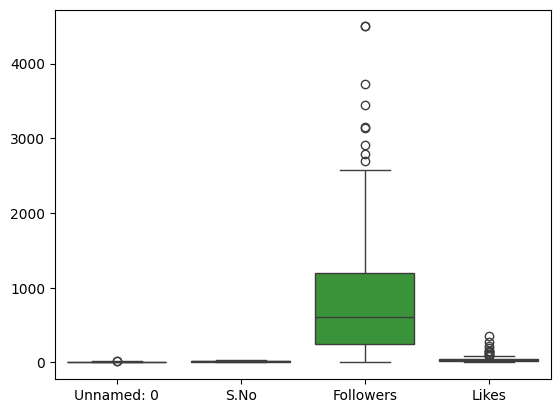

In [57]:
# Univariate Analysis:

# 1. Check for outliers

sns.boxplot(data=df)

# outliers present in the data in followers and likes columns



<Axes: xlabel='Followers', ylabel='Count'>

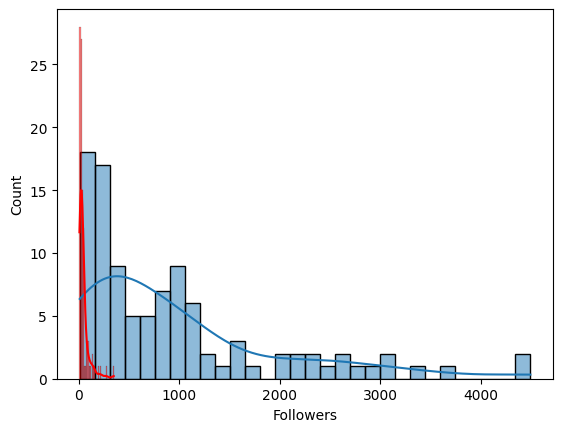

In [62]:
# histogram of the data

sns.histplot(data=df, x='Followers', bins=30, kde=True)

# Followers column has right skewness

sns.histplot(data=df, x='Likes', bins=30, kde=True, color='red')

# Likes column has right skewness


In [66]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f'{col}: {df[col].unique()}')
        print('------------------------')
        print(f'{df[col].value_counts()}')




USERNAME: ['mikequindazzi' 'drgorillapaints' 'aitrading_official'
 'opensourcedworkplace' 'crea.vision' 'be.masterly' 'lenovoworkstations'
 'kirellb' 'ethicsandai' 'diworksolucionesdeti' 'databowl' 'edwisor_india'
 'ubiqum' 'artificialintelligence.a.i' 'ansonmccade' 'jennifercodes'
 'eligible.api' 'ale_borba' 'amjstaffing' 'writtorg' 'superdatascience'
 'xotivtechnologies' 'onthetopsearch' 'data_enthusiast' 'programmer.io'
 'coding.is.life' 'theminest_' 'philosophercoin' 'greenhousegroup'
 'neondistrictrpg' 'blocsidesports' 'cryptocrackhead' 'gsmusicgroupllc'
 'iotatokennews' 'bitpainting' '_linda_smith567' 'litebit.eu'
 'meganbloemsma' 'ricmiqads' 'hollympeck' 'artificial_quotes' 'interwall'
 'entrancegmbh' 'usccareercenter' '_ehab.othman_' 'anki7singh'
 'mbnsolutions' 'triatebr' 'orcan_intel' 'funnelaico' 'iamalexleyva'
 'astrokpj' 'big.data.hush' 'iamjunkbot' 'ivarski' 'roland.busch'
 'oboteo.ai' 'cris.nemeth' 'interplayofficial' 'alpha_mentor_' 'magnodc'
 'thebeautymindset' 'remi_o

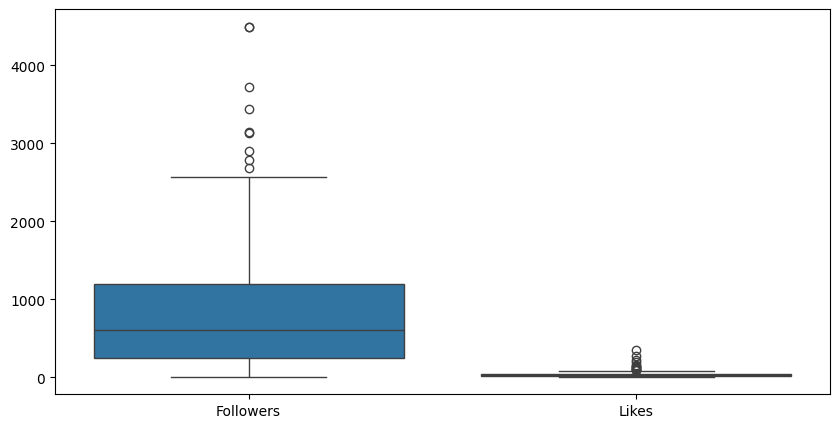

In [24]:
# Check for outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Followers', 'Likes']])
plt.show()

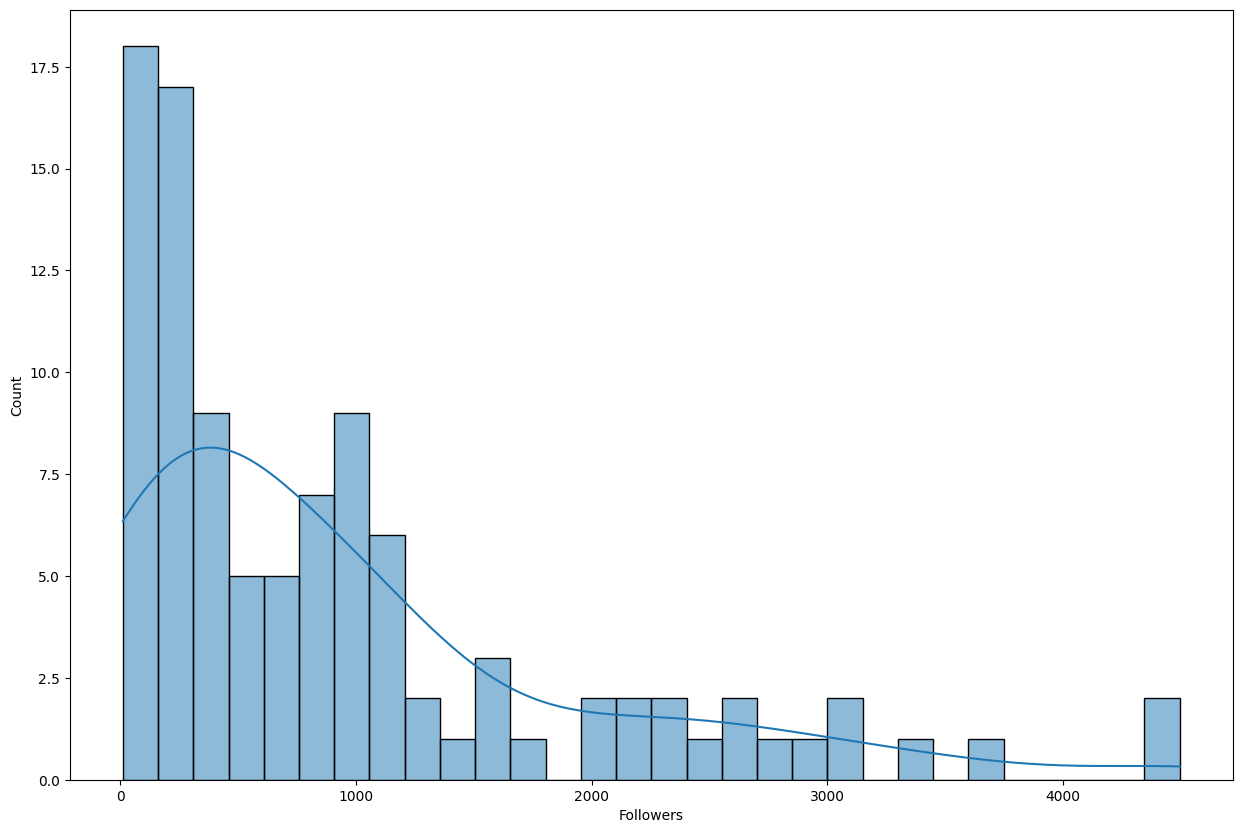

In [27]:
plt.figure(figsize=(15,10))
sns.histplot(data=df, x='Followers', bins=30, kde=True)
plt.show()


# Followers column has right skewness




In [67]:
# Encode Categorical Variables:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


df['USERNAME'] = le.fit_transform(df['USERNAME'])
df['Caption'] = le.fit_transform(df['Caption'])
df['Hashtags'] = le.fit_transform(df['Hashtags'])
df['Time since posted'] = le.fit_transform(df['Time since posted'])



In [69]:
# drop for Unnamed: 0 and S.No columns

df.drop(['Unnamed: 0', 'S.No'], axis=1, inplace=True)
df.head(2)

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,64,86,1600,17,0,139
1,29,82,880,97,2,23


In [70]:
# Feature Scaling:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

df[['Followers', 'Likes']] = sc.fit_transform(df[['Followers', 'Likes']])



In [71]:
# split the data into train and test

from sklearn.model_selection import train_test_split
X = df.drop('Likes', axis=1)
y = df['Likes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
# Model Training:

from sklearn.linear_model import LinearRegression, Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error




In [73]:
def evaluate_model(true, predict):
    r2=r2_score(true, predict)
    mae=mean_absolute_error(true,predict)
    mse=mean_squared_error(true,predict)
   

    return r2, mae,mse,

In [74]:
models={

    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    

}

In [75]:
for i in range(len(models)):
    model=list((models.values()))[i]
    print(model)
    
    
r2_list=[]

LinearRegression()
Lasso()
Ridge()
ElasticNet()


In [76]:
for i in range(len(models)):
    model=list(models.values())[i]
    
    model.fit(X_train,y_train)

    #make_prediction
    y_pred=model.predict(X_test)

    #this is for the validaiton
    R2,MAE,MSE=evaluate_model(y_test,y_pred)


    print("model training performance",model)
    print("MSE:", MSE)
    print("MAE:",MAE)
    print("R2 SCORE:",R2)
    
    r2_list.append(R2)

    print("="*40)
    print("\n")


model training performance LinearRegression()
MSE: 0.5731715149195288
MAE: 0.5454055674812589
R2 SCORE: -0.2146624067310272


model training performance Lasso()
MSE: 0.5697890468828481
MAE: 0.588962402998877
R2 SCORE: -0.2074942962105628


model training performance Ridge()
MSE: 0.5738908981711079
MAE: 0.5456902378662241
R2 SCORE: -0.21618692036958054


model training performance ElasticNet()
MSE: 0.5839728963143459
MAE: 0.5934749253920071
R2 SCORE: -0.23755264391053954




In [77]:
r2_list

[-0.2146624067310272,
 -0.2074942962105628,
 -0.21618692036958054,
 -0.23755264391053954]

# Lasso Regression has the lowest MSE (0.5697890468828481) and Ridge Regression has the lowest MAE (0.5456902378662241) 